## Prediction of Boston Housing and Loan Approval for those

In [109]:
#Importing numpy and pandas python libraries
import numpy as np
import pandas as pd 

#importing libraries and modules for data visulization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#importing scikit learn module to split data set into two data sets
from sklearn.model_selection import train_test_split

#importing scikit learn module for alogorithm/model: Linear regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

#importing Scikit learn model for K-fold cross validation and evaluation of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#import scikit learn model for classification report
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns


## Loading Data Set and seeing if there are any missing values or null values

             crim          zn       indus        chas         nox          rm  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

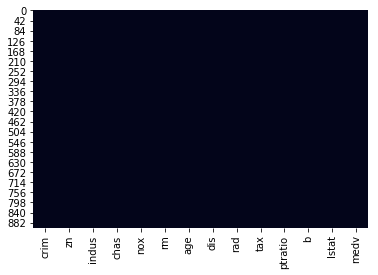

In [121]:
filename = "housing_boston.csv"
## reading CSV FIle
df = pd.read_csv(filename)

## Describing the data set variables and attributes statistics
print(df.describe())

## Describing the Data set information
df.info()

## Dropping the null or NAN values from the data
se = df.dropna()

print(se)

sns.heatmap(se.isnull(), cbar=False)

In [122]:
print (se.groupby('medv').size())

medv
6.3      1
7.0      1
8.1      1
8.5      1
9.5      1
11.0     1
11.3     1
11.5     1
11.7     1
11.8     1
11.9     1
12.1     1
12.3     1
12.5     1
12.6     1
12.7     2
12.8     1
13.0     1
13.1     3
13.2     1
13.3     3
13.4     3
13.5     2
13.6     2
13.8     3
13.9     1
14.0     1
14.1     2
14.2     1
14.3     2
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 210, dtype: int64


## Visualization of the whole data as part EDA

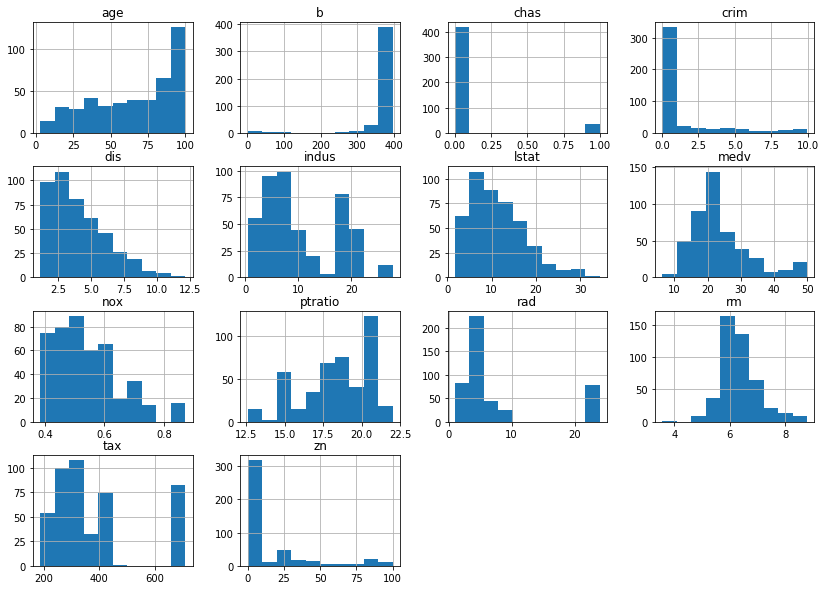

In [123]:
## Histogram visualization
se.hist(figsize = (14,10))

##Plotting the visualization
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


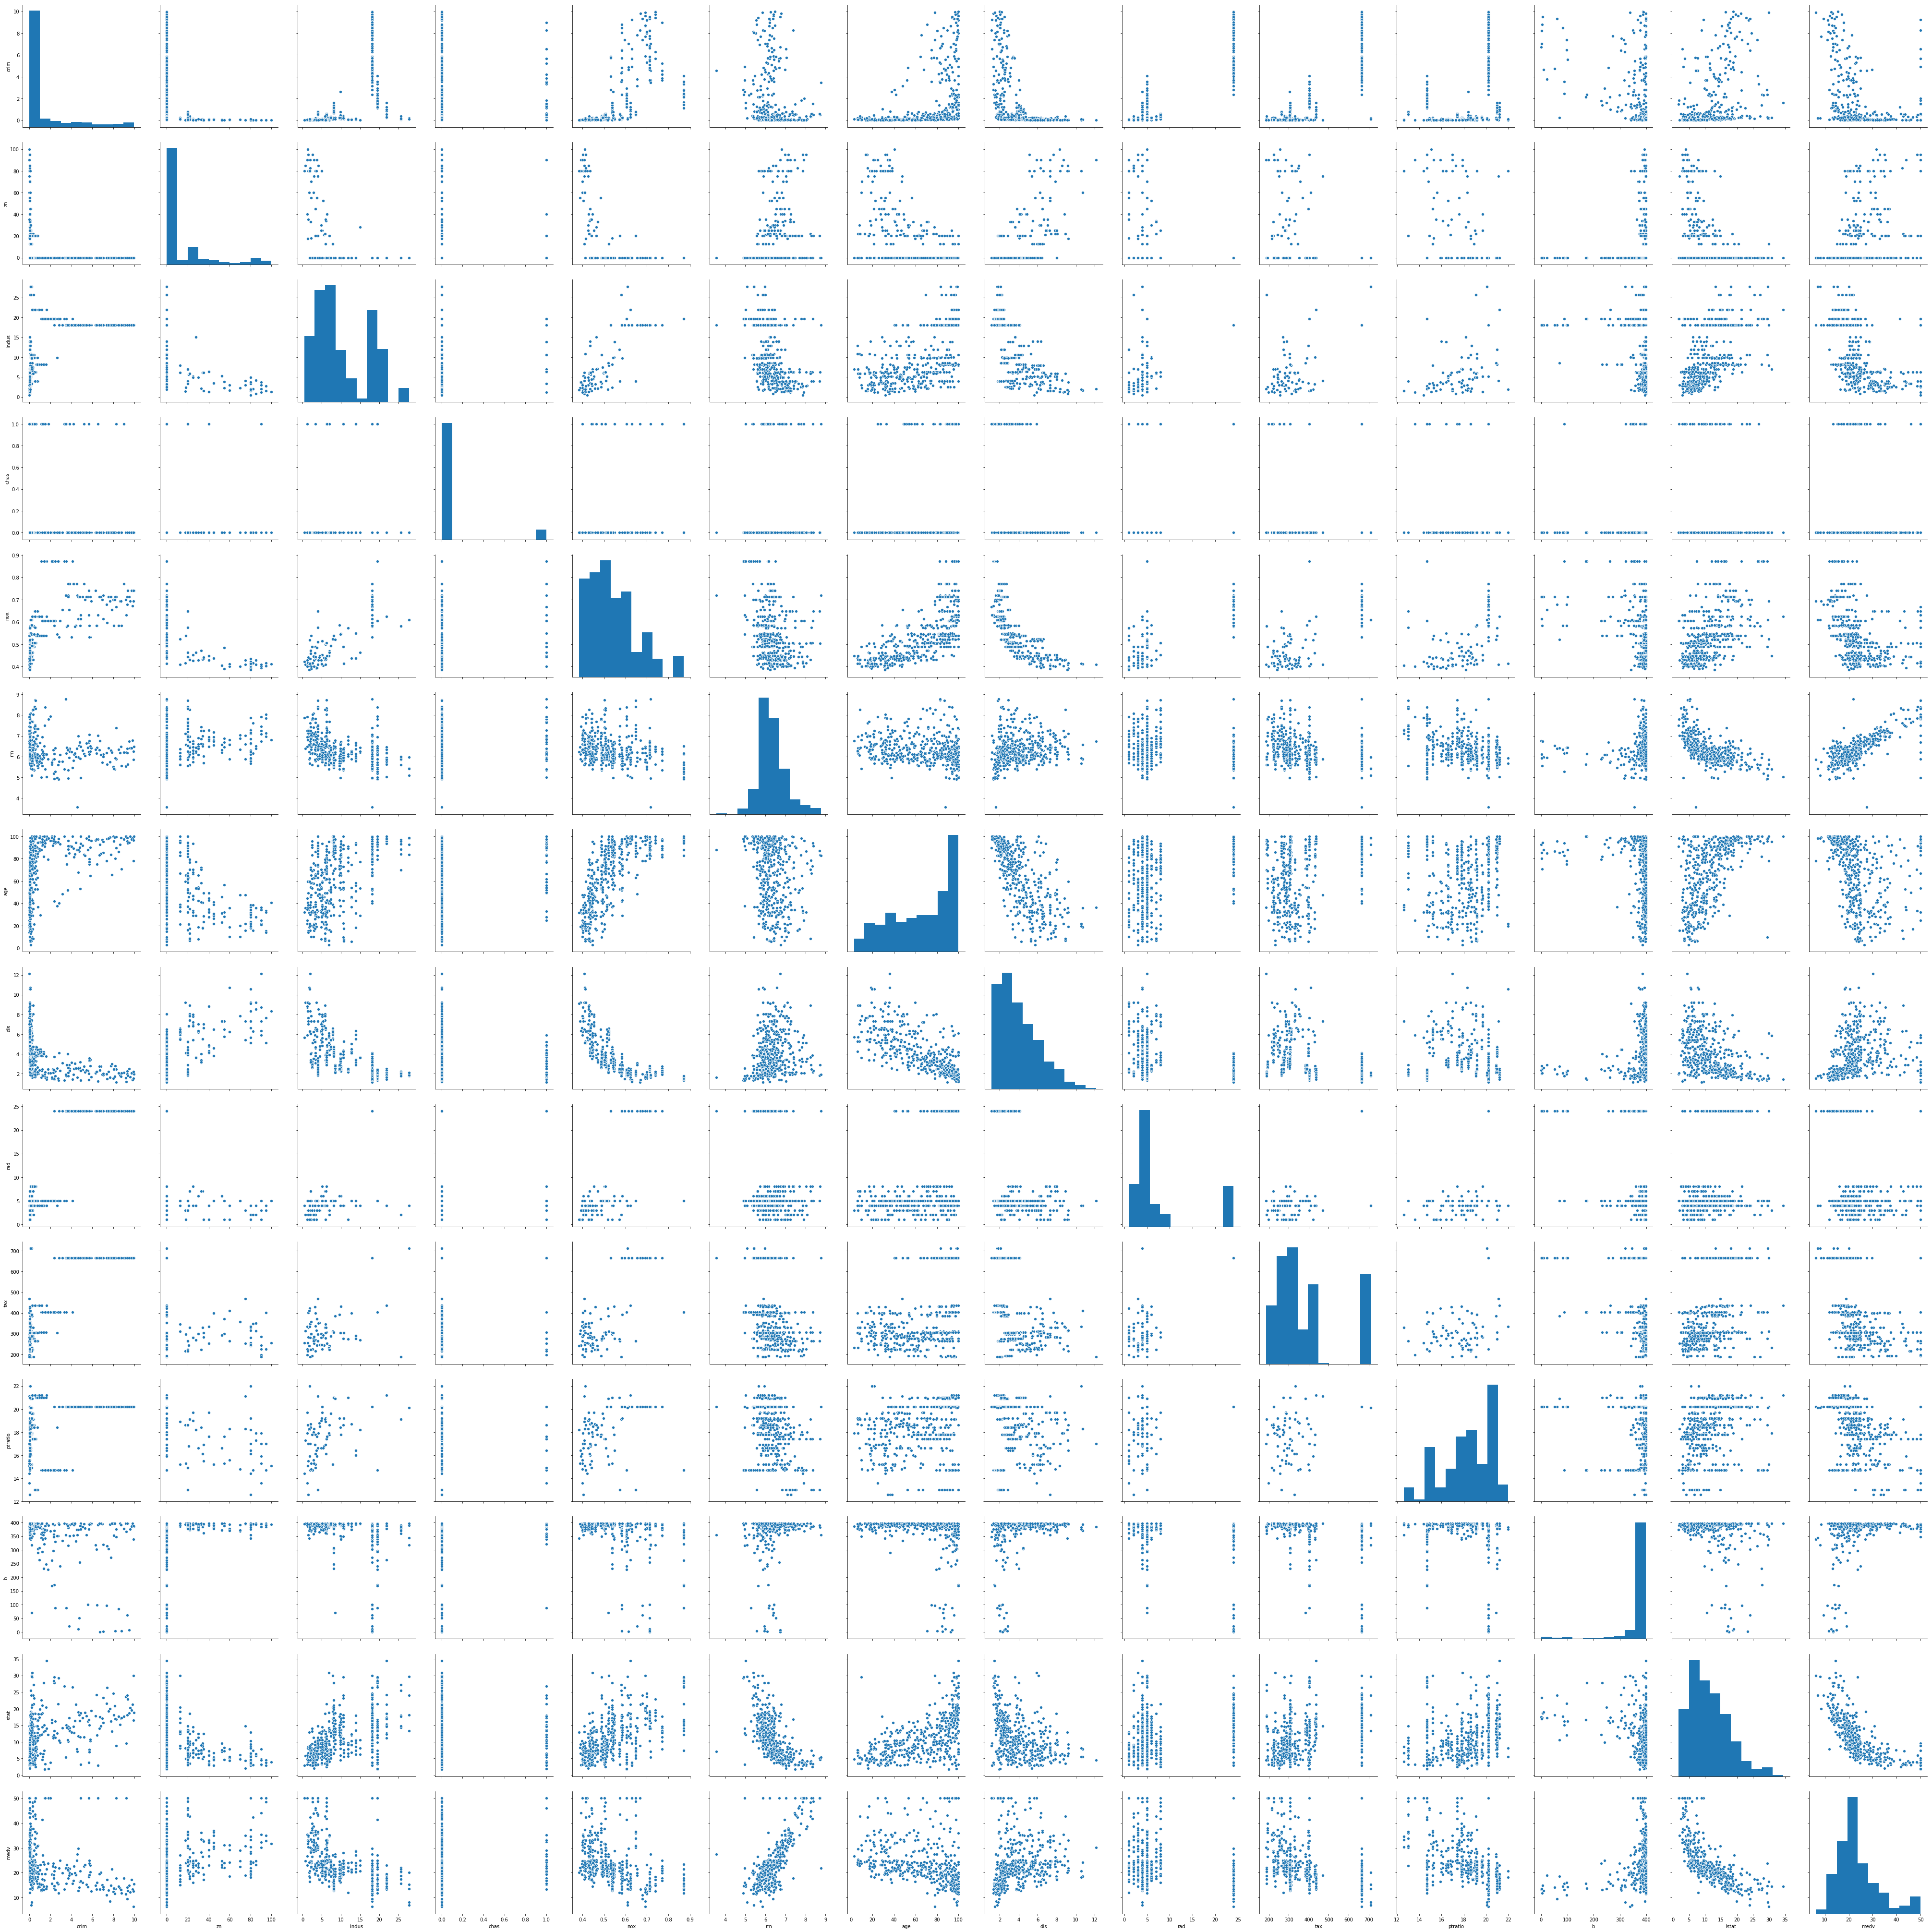

In [124]:
# Data visualization for variable in the given data set
sns.pairplot(se, size=4)
plt.tight_layout()

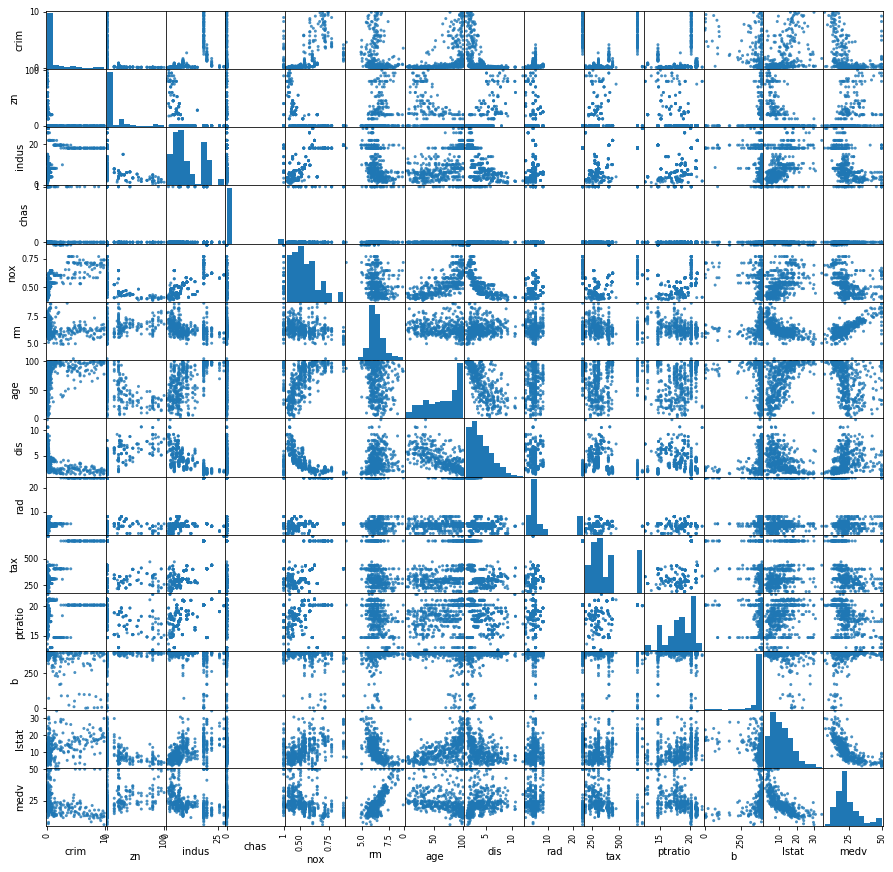

In [125]:
scatter_matrix(se,alpha=0.8,figsize=(15,15))
plt.show()

## By using Logistic regression for prediciting the median value of owner occupied  homes in 1000 dollars


In [126]:
array =se.values
X = array[:,1:5]

Y = array[:,5]

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

## Linear Regression Model for the given Data

In [131]:
se.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

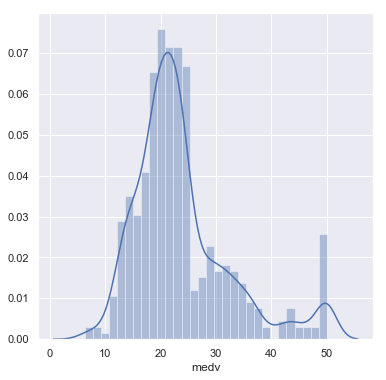

In [142]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(se['medv'], bins=30)
plt.show()

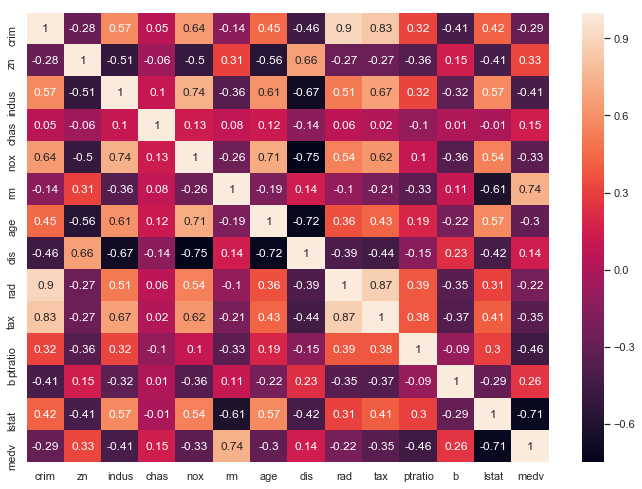

In [140]:
corr_matrix = se.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

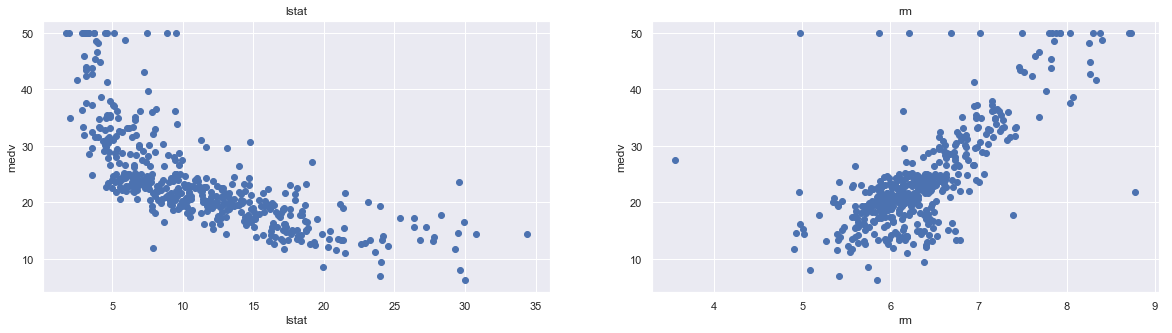

In [143]:
plt.figure(figsize=(20, 5))

fse = ['lstat', 'rm']
target = se['medv']

for i, col in enumerate(fse):
    plt.subplot(1, len(fse) , i+1)
    x = se[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [137]:
X = pd.DataFrame(np.c_[se['lstat'], se['rm']], columns = ['lstat','rm'])
Y = se['medv']

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(316, 2)
(136, 2)
(316,)
(136,)


In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

NameError: name 'LinearRegression' is not defined

In [153]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=10)
for train, test in fold.split(se):
    print("%s %s" % (train, test))


[ 46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 29

In [17]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
n_splits = 10
seed = 7
kfold = KFold(n_splits=10,random_state=7)
scoring='accuracy'
results= cross_val_score(model,X,Y,cv=kfold, scoring=scoring)
print("accuracy"% (results.mean(),results.std()))

NameError: name 'model' is not defined